In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import scipy
import scipy.stats as ss

# obtain the data: this should be changed to be statscraping
import mlbstatscraping as mss



In [2]:
# set up the parameters
analysis_year         = 2026 # what year are we projecting?
savedate              = '021626' # arbitrary tag for saving files
nclusters             = 12 # how many archetypes are there?
weight_distribution   = [0.5, 0.3, 0.13, 0.07] # how much do the past four years contribute?
regression_factor     = 0.8 # how much regression to the mean?
err_regression_factor = 1.5 # how much uncertainty in the regression to the mean?

year_weights = dict()
for year in range(analysis_year-1,analysis_year-5,-1):
    year_weights[year] = weight_distribution[analysis_year-year-1]



In [3]:


years = range(analysis_year-4,analysis_year)
for year in years:
    PitchingDF = mss.get_fangraphs_data('pitching',[year])
    PitchingDF.to_csv('data/AllPitching_{}.csv'.format(year),index=False)
    lastyeardf = PitchingDF
    if year == analysis_year-4:
        df = PitchingDF
    else:
        df = pd.concat([df,PitchingDF])



In [ ]:


# add optional age adjustments
import src.ageregression as ageregression
year_weights_penalty, age_penalty_slope, age_pivot = ageregression.return_age_factors()


# set up saves predictions 2023
#http://www.espn.com/fantasy/baseball/flb/story?page=REcloserorgchart

closers = [b'Felix Bautista',b'Kenley Jansen',b'Clay Holmes',b'Pete Fairbanks',b'Jordan Romano',\
          b'Kendall Graveman',b'Emmanuel Clase',b'Alex Lange',b'Scott Barlow',b'Jorge Lopez',\
          b'Ryan Pressly',b'Carlos Estevez',b'Trevor May',b'Paul Sewald',b'Jose Leclerc',\
          b'Raisel Iglesias',b'Dylan Floro',b'Edwin Diaz',b'Seranthony Dominguez',b'Kyle Finnegan',\
          b'Brad Boxberger',b'Alexis Diaz',b'Devin Williams',b'David Bednar',b'Ryan Helsley',\
          b'Mark Melancon',b'Daniel Bard',b'Evan Phillips',b'Josh Hader',b'Camilo Doval']

next_up = [b'Cionel Perez',b'Chris Martin',b'Jonathan Loaisiga',b'Jason Adam',b'Erik Swanson',\
          b'Aaron Bummer',b'James Karinchak',b'Jose Cisnero',b'Aroldis Chapman',b'Jhoan Duran',\
          b'Rafael Montero',b'Jimmy Herget',b'Zach Jackson',b'Andres Munoz',b'Johnathan Hernandez',\
          b'Joe Jimenez',b'Tanner Scott',b'David Robertson',b'Craig Kimbrel',b'Carl Edwards Jr.',\
          b'Brandon Hughes',b'Lucas Sims',b'Matt Bush',b'Wil Crowe',b'Giovanny Gallegos',\
          b'Kevin Ginkel',b'Pierce Johnson',b'Daniel Hudson',b'Robert Suarez',b'Taylor Rogers',\
          ]

tweaks = [b'Josh Hader',b'Dellin Betances',b'Zach Britton']

closers = [b'Paul Sewald',b'Raisel Iglesias',b'Craig Kimbrel',b'Kenley Jansen',b'Adbert Alzolay',b'John Brebbia',b'Alexis Diaz',b'Emmanuel Clase',b'Justin Lawrence',b'Alex Lange',b'Josh Hader',b'Will Smith',b'James McArthur',b'John McMillon',b'John Schreiber',b'Carlos Estevez',b'Robert Stephenson',b'Evan Phillips',b'Tanner Scott',b'Devin Williams',b'Jhoan Duran',b'Edwin Diaz',b'Clay Holmes',b'Mason Miller',b'Lucas Erceg',b'Trevor Gott',b'Dany Jimenez',b'Jose Alvarado',b'Jeff Hoffman',b'David Bednar',b'Ryan Helsley',b'Robert Suarez',b'Camilo Doval',b'Andres Munoz',b'Pete Fairbanks',b'Jose Leclerc',b'David Robertson',b'Jordan Romano',b'Kyle Finnegan',b'Hunter Harvey']
next_up = [b'Kevin Ginkel',b'Miguel Castro',b'A.J. Minter',b'Pierce Johnson',b'Yennier Cano',b'Danny Coulombe',b'Chris Martin',b'Josh Winckowski',b'Hector Neris',b'Julian Merryweather',b'Jesse Chavez',b'Bryan Shaw',b'Emilio Pagan',b'Lucas Sims',b'Scott Barlow',b'Trevor Stephan',b'Tyler Kinley',b'Daniel Bard',b'Jason Foley',b'Andrew Chafin',b'Ryan Pressly',b'Bryan Abreu',b'Matt Moore',b'Brusdar Graterol',b'Joe Kelly',b'Andrew Nardi',b'AJ Puk',b'Joel Payamps',b'Trevor Megill',b'Griffin Jax',b'Brock Stewart',b'Addam Ottavino',b'Drew Smith',b'Tommy Kahnle',b'Jonathan Loaisiga',b'Gregory Soto',b'Aroldis Chapman',b'Colin Holderman',b'Giovanny Gallegos',b'JoJo Romero',b'Yuki Matsui',b'Enyel De Los Santos',b'Tyler Rogers',b'Taylor Rogers',b'Matt Brash',b'Gregory Santos',b'Jason Adam',b'Colin Poche',b'Josh Sborz',b'Erik Swanson',b'Tim Mayza',b'Tanner Rainey']
tweaks = []

# 2026 edition
closers = [b'Ryan Helsley', b'Aroldis Chapman',b'David Bednar',b'Griffin Jax',b'Jeff Hoffman',\
           b'Seranthony Dominguez',b'Cade Smith',b'Kenley Jansen',b'Carlos Estevez',b'Justin Topa',\
            b'Mark Leiter Jr.',b'Josh Hader',b'Robert Stephenson',b'Andres Munoz',b'Robert Garcia',\
            b'Raisel Iglesias',b'Pete Fairbanks',b'Devin Williams',b'Jhoan Duran',b'Clayton Beeter',\
            b'Daniel Palencia',b'Emilio Pagan',b'Trevor Megill',b'Danny Santana',b"Riley O'Brien",\
            b'Kevin Ginkel',b'Victor Vodnik',b'Edwin Diaz',b'Mason Miller',b'Robert Walker'        ]
next_up = []
tweaks = []


In [5]:


# use 12 clusters
import src.makeclusters as makeclusters
year_df,stereotype_df,dfnew,hitter_cluster_centroid_df = makeclusters.create_pitching_clusters(df,nclusters,years,savedir='predictions/2026/all/')





/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mpetersen/FantasyBaseball/mlb-player-predictions/src/makeclusters.py:244: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  idx = short_hitter_df.groupby(['Clusters'])['Centroid Diff'].transform(min) == short_hitter_df['Centroid Diff']


In [6]:
# now we need a pitching projection
import src.totalbattersfaced as totalbattersfaced
IPDict1 = totalbattersfaced.get_ip_predictions(np.array(dfnew['Name'].values),lastyeardf)

In [7]:
IPDict1['Aaron Civale']

102.0

In [8]:
dfnew.keys()

Index(['#', 'Name', 'Team', 'W', 'L', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV',
       'HLD', 'BS', 'IP', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP',
       'WP', 'BK', 'SO', 'Year', 'HR.Normalize', 'ER.Normalize',
       'BB.Normalize', 'H.Normalize', 'SO.Normalize', 'Clusters',
       'Value Cluster'],
      dtype='object')

In [98]:

# make a threshold that only gives starters
import src.projectplayers as projectplayers

pls = np.unique(np.array(list(df['Name'])))

minG = 5
pls1 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')>minG)&(df['Year']==2025))])))
pls2 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')>minG)&(df['Year']==2024))])))
pls3 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')>minG)&(df['Year']==2023))])))
pls4 = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')>minG)&(df['Year']==2022))])))


# select closers
minG = 1
pls1c = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')<minG)&(df['Year']==2025))])))
pls2c = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')<minG)&(df['Year']==2024))])))
pls3c = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')<minG)&(df['Year']==2023))])))
pls4c = np.unique(np.array(list(df['Name'].loc[((df['GS'].astype('float')<minG)&(df['Year']==2022))])))


# select everyone who started more than minG in a season
pls = np.unique(np.concatenate([pls1,pls2,pls3,pls4,pls1c,pls2c,pls3c,pls4c]))


In [99]:
print(pls)

['A.J. Minter' 'A.J. Puk' 'AJ Smith-Shawver' 'Aaron Ashby' 'Aaron Bummer'
 'Aaron Civale' 'Aaron Loup' 'Aaron Nola' 'Aaron Sanchez' 'Abner Uribe'
 'Adam Cimber' 'Adam Mazur' 'Adam Oller' 'Adam Ottavino' 'Adam Wainwright'
 'Adbert Alzolay' 'Adonis Medina' 'Adrian Houser' 'Adrian Martinez'
 'Adrian Morejon' 'Adrian Sampson' 'Albert Abreu' 'Albert Suarez'
 'Alec Marsh' 'Alek Jacob' 'Alek Manoah' 'Alex Cobb' 'Alex Colome'
 'Alex Faedo' 'Alex Lange' 'Alex Vesia' 'Alex Wood' 'Alex Young'
 'Alexis Diaz' 'Allan Winans' 'Amir Garrett' 'Amos Willingham'
 'Andre Jackson' 'Andre Pallante' 'Andres Machado' 'Andres Munoz'
 'Andrew Abbott' 'Andrew Bellatti' 'Andrew Chafin' 'Andrew Heaney'
 'Andrew Kittredge' 'Andrew Nardi' 'Andrew Saalfrank' 'Andrew Suarez'
 'Andrew Vasquez' 'Angel Chivilli' 'Angel Perdomo' 'Angel Zerpa'
 'Anibal Sanchez' 'Anthony Bass' 'Anthony Bender' 'Anthony DeSclafani'
 'Anthony Misiewicz' 'Antonio Senzatela' 'Aroldis Chapman' 'Art Warren'
 'Austin Adams' 'Austin Gomber' 'Austin

In [100]:


IPDict = dict()
for pl in pls:
    try:
        IPDict[pl] = float(IPDict1[pl])
    except:
        IPDict[pl] = 25.



IPDict = dict()
IPDF = mss.get_fantasypros_projections('pitchers',preseason=True)
for pl in pls:
    try:
        IPDict[pl] = float(IPDF['IP'][IPDF['Player']==(pl+' ')].values[0])
    except:
        print('Failed for {}'.format(pl))
        IPDict[pl] = 25.




Failed for Aaron Loup
Failed for Aaron Sanchez
Failed for Adam Cimber
Failed for Adam Oller
Failed for Adam Ottavino
Failed for Adam Wainwright
Failed for Adonis Medina
Failed for Adrian Martinez
Failed for Adrian Sampson
Failed for Albert Abreu
Failed for Alex Colome
Failed for Alex Wood
Failed for Alex Young
Failed for Allan Winans
Failed for Amir Garrett
Failed for Amos Willingham
Failed for Andre Jackson
Failed for Andres Machado
Failed for Andrew Bellatti
Failed for Andrew Heaney
Failed for Andrew Saalfrank
Failed for Andrew Suarez
Failed for Andrew Vasquez
Failed for Anibal Sanchez
Failed for Anthony Bass
Failed for Anthony DeSclafani
Failed for Art Warren
Failed for Austin Adams
Failed for Austin Pruitt
Failed for Brad Boxberger
Failed for Brad Hand
Failed for Brandon Bielak
Failed for Brandon Hughes
Failed for Brent Honeywell
Failed for Bruce Zimmermann
Failed for Bryan Shaw
Failed for Buck Farmer
Failed for Burch Smith
Failed for Cameron Schlittler
Failed for Chad Kuhl
Failed 

In [101]:
IPDict

{'A.J. Minter': 54.1,
 'A.J. Puk': 34.4,
 'AJ Smith-Shawver': 8.2,
 'Aaron Ashby': 66.0,
 'Aaron Bummer': 60.9,
 'Aaron Civale': 122.3,
 'Aaron Loup': 25.0,
 'Aaron Nola': 168.6,
 'Aaron Sanchez': 25.0,
 'Abner Uribe': 72.3,
 'Adam Cimber': 25.0,
 'Adam Mazur': 32.7,
 'Adam Oller': 25.0,
 'Adam Ottavino': 25.0,
 'Adam Wainwright': 25.0,
 'Adbert Alzolay': 43.6,
 'Adonis Medina': 25.0,
 'Adrian Houser': 143.0,
 'Adrian Martinez': 25.0,
 'Adrian Morejon': 69.2,
 'Adrian Sampson': 25.0,
 'Albert Abreu': 25.0,
 'Albert Suarez': 30.7,
 'Alec Marsh': 18.8,
 'Alek Jacob': 34.0,
 'Alek Manoah': 95.0,
 'Alex Cobb': 43.6,
 'Alex Colome': 25.0,
 'Alex Faedo': 12.8,
 'Alex Lange': 47.1,
 'Alex Vesia': 63.4,
 'Alex Wood': 25.0,
 'Alex Young': 25.0,
 'Alexis Diaz': 57.3,
 'Allan Winans': 25.0,
 'Amir Garrett': 25.0,
 'Amos Willingham': 25.0,
 'Andre Jackson': 25.0,
 'Andre Pallante': 143.0,
 'Andres Machado': 25.0,
 'Andres Munoz': 64.0,
 'Andrew Abbott': 166.0,
 'Andrew Bellatti': 25.0,
 'Andrew Ch

In [102]:

print('Projecting {} players'.format(pls.size))

printfile = 'predictions/2026/all/pitcher_predictions'+savedate+'.dat'

ShouldProject = projectplayers.predict_pitchers(pls,years,printfile,dict(),IPDict,dfnew,hitter_cluster_centroid_df,year_weights,year_weights_penalty,regression_factor,err_regression_factor,age_penalty_slope,age_pivot)
print(ShouldProject)





Projecting 834 players
[]


In [103]:
print(pl,year)
list(dfnew['Value Cluster'][(dfnew['Name']==pl) & (dfnew['Year']==year) ])[0]

Zebby Matthews 2025


5.0

In [104]:
df = dfnew

In [105]:


# bring the data back in
A = np.genfromtxt(printfile,\
                  dtype={'names':       ("Name", "HR", "eHR","sHR",\
                                         "ER","eER","sER",\
                                         "BB", "eBB","sBB",\
                                         "H","eH","sH",\
                                         "SO","eSO","sSO",\
                                        "TBF","IPc","IP","Afac"),\
                             'formats': ('S20',  'i4',   'i4', 'f8',\
                                         'i4',  'i4', 'f8',\
                                         'i4','i4',  'f8', \
                                         'i4',  'i4', 'f8',\
                                         'i4',  'i4', 'f8',\
                                         'i4',  'i4',  'i4','f4')},\
                 delimiter=',')

print(np.nanmax(A['SO']))
print(len(A['Name']))

240
487


In [106]:
import src.pitchingmodels as pmodels
era,eera,whip,ewhip,ww,eww = pmodels.make_wins_model(A)



487


In [107]:

import src.rankandprint as rprint

# very first ranking
# create blank svals for first sorting
svals = np.zeros(len(ww))

totrank,valrank = rprint.make_totrank_pitching(A,era,eera,whip,ewhip,ww,svals)


fantasy_stats = ['HR', 'ER', 'BB', 'H', 'SO']
xvals = np.linspace(0.,350.,2000)
LDict,MDict,HDict = rprint.make_mid_min_max(A,totrank,fantasy_stats,xvals,simple=True)


In [108]:
svals,esvals = pmodels.make_saves(A,totrank,closers,next_up,tweaks)

# rerank with Saves
# and weight categories again
# [ip,so,era,whip,w,svals]
weights = [1.0,2.0,1.0,1.0,0.5,1.0]
weights = [1.0,2.0,0.5,1.0,0.5,1.0] # a
weights = [1.0,2.0,1.0,1.0,0.0,1.0] # b
weights = [0.5,2.0,1.0,1.0,0.0,1.0] # c

totrank,valrank = rprint.make_totrank_pitching(A,era,eera,whip,ewhip,ww,svals,weights=weights)


printfile = 'predictions/2026/all/pitcher_predictions'+savedate+'.tbl'
rprint.print_html_ranks_pitching(printfile,A,totrank,LDict,MDict,HDict,era,eera,whip,ewhip,ww,eww,svals,esvals)

printfile = 'predictions/2026/all/pitcher_predictions_'+savedate+'.csv'
#rprint.print_csv_ranks_pitching(printfile,A,totrank,valrank,LDict,MDict,HDict,era,eera,whip,ewhip,ww,eww,svals,esvals)
rprint.print_csv_ranks_pitching(printfile,A,totrank,LDict,MDict,HDict,era,eera,whip,ewhip,ww,eww,svals,esvals)


0 b'Cade Smith' 38
1 b'Edwin Diaz' 37
2 b'Mason Miller' 37
3 b'Andres Munoz' 36
4 b'Raisel Iglesias' 35
5 b'Jhoan Duran' 34
6 b'Josh Hader' 34
7 b'Aroldis Chapman' 33
8 b'Carlos Estevez' 32
9 b'Trevor Megill' 31
10 b'Griffin Jax' 31
11 b"Riley O'Brien" 30
12 b'Jeff Hoffman' 29
13 b'Daniel Palencia' 29
14 b'Emilio Pagan' 28
15 b'Kenley Jansen' 27
16 b'Pete Fairbanks' 26
17 b'David Bednar' 26
18 b'Devin Williams' 25
19 b'Robert Garcia' 24
20 b'Ryan Helsley' 24
21 b'Clayton Beeter' 23
22 b'Robert Stephenson' 22
23 b'Seranthony Dominguez' 21
24 b'Victor Vodnik' 21
25 b'Justin Topa' 20
26 b'Mark Leiter Jr.' 19
27 b'Kevin Ginkel' 18


In [109]:
year

2025

In [110]:
import pandas as pd

In [111]:
LY = pd.read_csv('data/AllPitching_2025.csv')
TY = pd.read_csv('predictions/2026/all/pitcher_predictions_'+savedate+'.csv')
IPDF = mss.get_fantasypros_projections('pitchers',preseason=True)


# tag last year with year
LY = LY.add_suffix('2025')
LY = LY.rename(columns={'Name2025': 'Name'})

# tag expert projections
IPDF = IPDF.add_suffix('expert')
IPDF = IPDF.rename(columns={'Nameexpert': 'Name'})


In [112]:
IPDF['Name'] = IPDF['Playerexpert'].str.rstrip()
TY['Name'] = TY['Name'].str.rstrip()

In [113]:
RDF = mss.get_fantasypros_ranks()

# tag expert projections
RDF = RDF.add_suffix('draft')
RDF['Name'] = RDF['player_namedraft'].str.rstrip()

In [114]:
CP = pd.merge(IPDF,TY,on='Name')
CP = pd.merge(CP,RDF,on='Name')

In [115]:
CP

,Playerexpert,IPexpert,Kexpert,Wexpert,SVexpert,ERAexpert,WHIPexpert,ERexpert,Hexpert,BBexpert,...,has_imagedraft,player_espn_positionsdraft,player_cbs_positionsdraft,player_page_urldraft,rank_ecrdraft,rank_mindraft,rank_maxdraft,rank_avedraft,rank_stddraft,pos_rankdraft
0,Shohei Ohtani,116.8,141,9,0,3.36,1.10,44,91,38,...,1,"DH,SP","SP,DH",https://www.fantasypros.com/mlb/players/shohei...,1,1,2,1.08,0.24,DH1
1,Tarik Skubal,195.0,238,14,0,2.72,0.96,59,148,40,...,1,SP,SP,https://www.fantasypros.com/mlb/players/tarik-...,7,2,22,8.69,2.78,SP1
2,Paul Skenes,186.9,223,14,0,2.77,1.03,58,145,48,...,1,SP,SP,https://www.fantasypros.com/mlb/players/paul-s...,10,5,20,11.06,2.08,SP2
3,Garrett Crochet,186.8,230,14,0,3.00,1.06,62,150,48,...,1,SP,SP,https://www.fantasypros.com/mlb/players/garret...,13,7,23,12.94,3.38,SP3
4,Bryan Woo,187.3,189,13,0,3.41,1.05,71,157,40,...,1,SP,SP,https://www.fantasypros.com/mlb/players/bryan-...,41,17,69,42.06,5.62,SP9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Dan Altavilla,29.8,25,1,0,4.76,1.47,16,29,15,...,1,RP,RP,https://www.fantasypros.com/mlb/players/dan-al...,1425,1154,1154,"1,154.00",0.00,RP430
478,McCade Brown,31.5,29,1,0,5.25,1.47,18,32,14,...,0,SP,SP,https://www.fantasypros.com/mlb/players/mccade...,1468,1282,1282,"1,282.00",0.00,SP306
479,Jack Kochanowicz,29.6,19,1,0,4.95,1.49,16,32,12,...,1,SP,SP,https://www.fantasypros.com/mlb/players/jack-k...,1451,1202,1202,"1,202.00",0.00,SP303
480,Luis Peralta,30.9,29,1,0,5.27,1.60,18,32,18,...,1,RP,RP,https://www.fantasypros.com/mlb/players/luis-p...,1458,1241,1241,"1,241.00",0.00,RP443


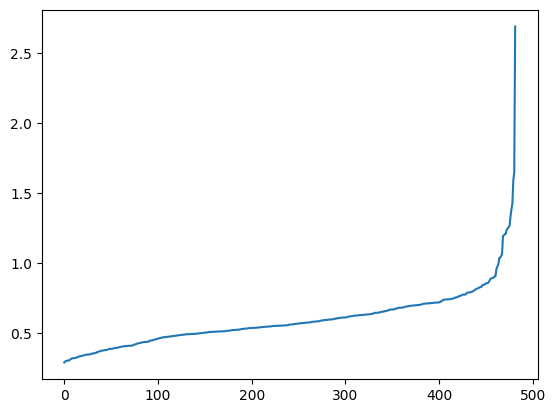

In [116]:

cpnorm = (CP['eSO']/CP['SO'] + CP['eERA']/CP['ERA'] + CP['eWHIP']/CP['WHIP']).values
cpnorm

plt.plot(cpnorm[cpnorm.argsort()])

In [117]:
CP[CP['Name']=='Paul Skenes']['WHIP']

2    0.97
Name: WHIP, dtype: float64

In [118]:
# make a 'confidence percentile'

CP['confidencevalue'] = 1./(CP['eSO']/CP['SO'] + CP['eERA']/CP['ERA'] + CP['eWHIP']/CP['WHIP'])
CP['confidencepercentile'] = np.round(100.*CP['confidencevalue'].rank(pct=True),1)

CP['rank_avedraft'] = CP['rank_avedraft'].str.replace(',', '').astype(float)


In [119]:
CP.keys()

Index(['Playerexpert', 'IPexpert', 'Kexpert', 'Wexpert', 'SVexpert',
       'ERAexpert', 'WHIPexpert', 'ERexpert', 'Hexpert', 'BBexpert',
       'HRexpert', 'Gexpert', 'GSexpert', 'Lexpert', 'CGexpert',
       'PlayerIdexpert', 'Teamexpert', 'Name', 'IP', 'SO', 'eSO', 'ERA',
       'eERA', 'WHIP', 'eWHIP', 'W', 'eW', 'S', 'eS', 'Rank', 'Unnamed: 13',
       'player_iddraft', 'player_namedraft', 'player_short_namedraft',
       'player_team_iddraft', 'filenamedraft', 'position_iddraft',
       'primary_positiondraft', 'player_positionsdraft',
       'yahoo_player_iddraft', 'has_imagedraft', 'player_espn_positionsdraft',
       'player_cbs_positionsdraft', 'player_page_urldraft', 'rank_ecrdraft',
       'rank_mindraft', 'rank_maxdraft', 'rank_avedraft', 'rank_stddraft',
       'pos_rankdraft', 'confidencevalue', 'confidencepercentile'],
      dtype='object')

In [120]:
# pick columns to print to csv
savecols = ['Name','IP','SO','ERA','WHIP','W','S','confidencepercentile','Rank','rank_avedraft','rank_stddraft','rank_ecrdraft']

CPshort = CP[savecols]

CPshort = CPshort.rename(columns={'confidencepercentile':'Confidence','Rank': 'Toolz Sorted Rank', 'rank_avedraft': 'Draft Rank Average', 'rank_stddraft': 'Draft Rank Variance', 'rank_ecrdraft': 'Expert Consensus Rank'})



CPshort.to_csv('predictions/2026/pitcher_predictions_2026.csv', index=False, float_format="%.1f")


In [96]:
CP['Kdiff'] = CP['SO'].astype(float)-CP['K'].astype(float)

KeyError: 'K'

In [30]:
CP[CP['Name']=='MacKenzie Gore']

,Player,IP_x,K,W_x,SV,ERA_x,WHIP_x,ER,H,BB,...,ERA_y,eERA,WHIP_y,eWHIP,W_y,eW,S,eS,Rank,Unnamed: 13


In [44]:
CP[CP['Kdiff']>20][['Name','K','SO','Kdiff']]

,Name,K,SO,Kdiff
27,Brandon Woodruff,161,189,28.0
29,Kyle Bradish,158,197,39.0
47,Chase Burns,156,195,39.0
50,Nolan McLean,146,178,32.0
56,Robbie Ray,178,200,22.0
68,Jacob Misiorowski,160,184,24.0
102,Jacob Lopez,134,162,28.0


Text(0, 0.5, 'Toolz-Consensus')

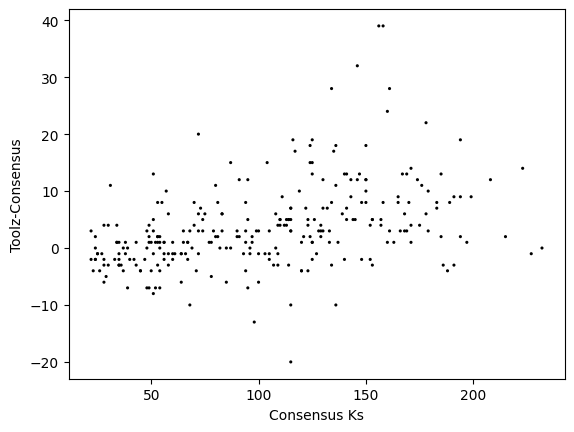

In [41]:
plt.scatter(CP['K'].astype(float),(CP['SO'].astype(float)-CP['K'].astype(float)),facecolor='black',edgecolor='none',s=5.)
plt.xlabel('Consensus Ks')
plt.ylabel('Toolz-Consensus')

In [25]:
TY['Name'] = TY['Name'].str.rstrip()

In [26]:
MY = pd.merge(LY,TY,on='Name')

In [27]:
MY

,#,Name,Team,W_x,L,ERA_x,G,GS,CG,ShO,...,ERA_y,eERA,WHIP,eWHIP,W_y,eW,S,eS,Rank,Unnamed: 13
0,57.0,Erik Miller,SFG,4.0,1.0,1.50,36.0,0.0,0.0,0.0,...,2.66,2.21,1.38,0.60,1,22,0,0,173,NaN
1,62.0,Chase Silseth,LAA,0.0,0.0,1.64,10.0,0.0,0.0,0.0,...,4.75,0.88,1.38,0.28,0,4,0,0,251,NaN
2,69.0,Nathan Eovaldi,TEX,11.0,3.0,1.73,22.0,22.0,1.0,1.0,...,2.82,0.69,1.01,0.22,13,4,0,0,17,NaN
3,74.0,Trevor Rogers,BAL,9.0,3.0,1.81,18.0,18.0,1.0,0.0,...,3.24,0.60,1.18,0.17,12,4,0,0,49,NaN
4,79.0,Paul Skenes,PIT,10.0,10.0,1.97,32.0,32.0,1.0,0.0,...,2.14,1.38,0.97,0.22,16,4,0,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,755.0,Mike Clevinger,CHW,0.0,2.0,7.94,8.0,0.0,0.0,0.0,...,3.89,0.89,1.18,0.27,0,4,0,0,194,NaN
256,761.0,Roddery Munoz,STL,0.0,0.0,8.18,9.0,0.0,0.0,0.0,...,6.24,1.84,1.55,0.43,0,24,0,0,273,NaN
257,774.0,Carson Palmquist,COL,0.0,4.0,8.91,9.0,7.0,0.0,0.0,...,8.73,1.64,2.03,0.54,0,52,0,0,284,NaN
258,796.0,Joey Estes,ATH,0.0,2.0,9.82,3.0,2.0,0.0,0.0,...,4.82,1.24,1.25,0.36,0,39,0,0,259,NaN


In [28]:
MY.keys()

Index(['#', 'Name', 'Team', 'W_x', 'L', 'ERA_x', 'G', 'GS', 'CG', 'ShO', 'SV',
       'HLD', 'BS', 'IP_x', 'TBF', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'HBP',
       'WP', 'BK', 'SO_x', 'Year', 'IP_y', 'SO_y', 'eSO', 'ERA_y', 'eERA',
       'WHIP', 'eWHIP', 'W_y', 'eW', 'S', 'eS', 'Rank', 'Unnamed: 13'],
      dtype='object')

Text(0, 0.5, '2026 Projected - 2025 Saves')

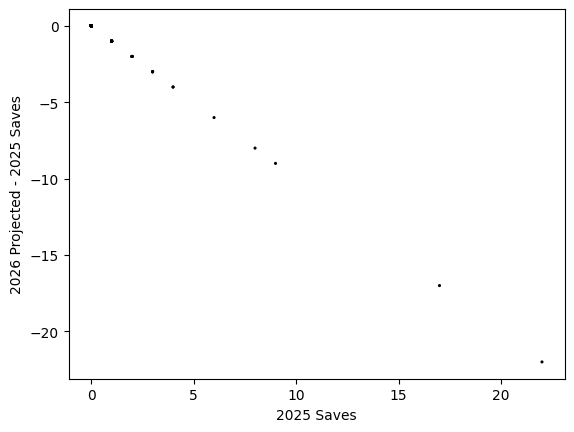

In [29]:
plt.scatter(MY['SV'],(MY['S']-MY['SV']),facecolor='black',edgecolor='none',s=5.)
plt.xlabel('2025 Saves')
plt.ylabel('2026 Projected - 2025 Saves')

Text(0, 0.5, '2026 Projected - 2025 Strikeouts')

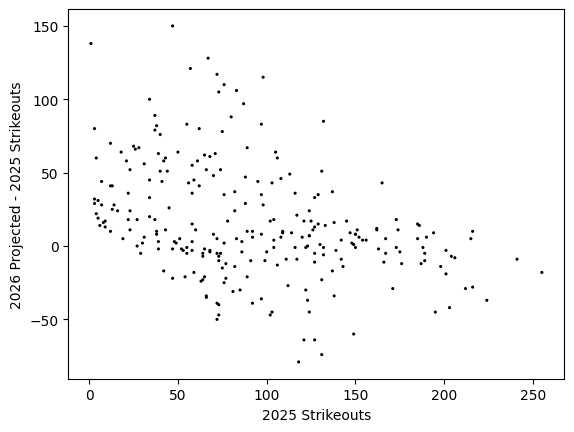

In [30]:
plt.scatter(MY['SO_x'],(MY['SO_y']-MY['SO_x']),facecolor='black',edgecolor='none',s=5.)
plt.xlabel('2025 Strikeouts')
plt.ylabel('2026 Projected - 2025 Strikeouts')

Text(0, 0.5, '2026 Projected - 2025 WHIP')

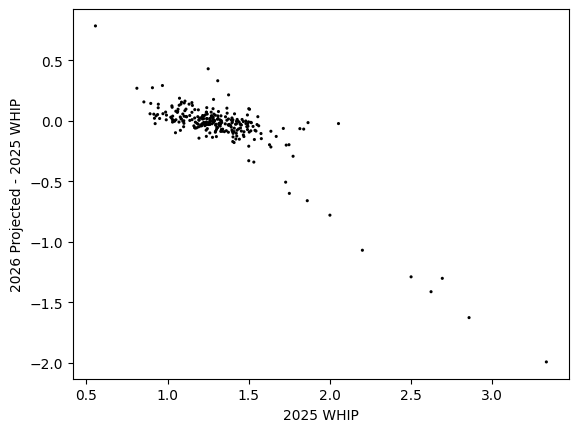

In [44]:
WHIP2 = (MY['H'] + MY['BB']) / MY['IP_x']
plt.scatter(WHIP2,(MY['WHIP']-WHIP2),facecolor='black',edgecolor='none',s=5.)
plt.xlabel('2025 WHIP')
plt.ylabel('2026 Projected - 2025 WHIP')

In [45]:
print(TY['Name'].values[0:10])

['Tarik Skubal' 'Paul Skenes' 'Garrett Crochet' 'Jacob deGrom'
 'Chris Sale' 'Hunter Greene' 'Bryan Woo' 'Brandon Woodruff'
 'Yoshinobu Yamamoto' 'Nolan McLean']


In [ ]:
'Tarik Skubal' 'Paul Skenes' 'Garrett Crochet' 'Jacob deGrom'
 'Yoshinobu Yamamoto' 'Bryan Woo' 'Freddy Peralta' 'Zack Wheeler'
 'Nick Pivetta' 'Max Fried'